# Эксперименты по обучению на датасетах reservoir

Датасеты получены в результате расчёта на гидродинамическом симуляторе ECLIPSE Blackoil. Для выбранной модели пласта и сценария разработки (рассматривается синтетическая модель, представленная на рис) при проведении расчётов фиксировались все параметры, кроме четырёх (пористости и проницаемости матрицы, пористости и проницаемости трещин)

In [1]:
#import os
#from IPython.display import Image
#Image(url=os.path.join('images','reservoir','synthetic_model.png'), width=800, height=400)

<center> <img src="images/reservoir/synthetic_model.png" width="600px" /> </center>

4 параметра варьировались методом латинского гиперкуба, и проводился расчёт: дебиты нефти в первые 5 лет разработки записывались в соответствующую строку с текущими значениями варьируемых параметров.

Для каждого датасета было сгенерировано 3 гиперкуба (для обучения, валидации и проверки)

In [2]:
import pandas as pd
import numpy as np

Датасет 1 содержит 400 примеров для обучения (первые 400 строк), 100 примеров для валидации (следующие 100 строк) и 800 примеров для проверки (следующие 800 строк). Расчёты проводились для первого сценария разработки

In [3]:
data1 = pd.read_csv(os.path.join('datasets', 'reservoir', 'reservoir_train400_scenario1.csv'))
data1.head()

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,0.21100,2.17400,0.014675,1400.375,0,67.43562,131.4994,183.2932,224.5630,249.7905,...,85.50780,82.61002,79.99155,77.52847,74.87337,72.41143,69.99726,67.62505,65.28770,63.00892
1,0.19225,8.27100,0.010400,1483.250,0,64.59608,123.5471,171.1804,209.6795,238.2284,...,51.93359,48.90244,46.20414,43.79527,41.34522,38.86421,36.20404,33.51224,31.35427,29.51257
2,0.21975,6.38275,0.012200,1410.125,0,59.89659,116.4695,163.4962,202.2798,231.0852,...,84.37846,79.25503,73.43829,69.06870,65.60688,62.29403,58.89056,55.69555,52.56306,49.41299
3,0.17725,4.99500,0.037062,435.125,0,64.23164,128.6341,179.6088,221.4585,256.1675,...,103.99100,99.48777,95.12907,91.19880,86.97459,81.89688,75.66498,70.85409,66.96544,63.26744
4,0.20625,9.22650,0.034362,1088.375,0,140.04380,227.9327,286.8897,328.3230,357.4857,...,120.93770,115.23790,108.47000,100.44030,94.15714,88.79877,83.78366,79.06993,74.59715,70.24670


Датасет 2 содержит 800 примеров для обучения (первые 800 строк), 200 примеров для валидации (следующие 200 строк) и 1600 примеров для проверки (следующие 1600 строк). Расчёты проводились для первого сценария разработки

In [4]:
data2 = pd.read_csv(os.path.join('datasets', 'reservoir', 'reservoir_train800_scenario1.csv'))
data2.head()

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,0.177500,8.350625,0.038413,444.8750,0,74.95135,142.45130,194.79360,237.0151,271.2165,...,94.13045,89.59142,85.31583,81.22491,77.40237,73.93965,70.58395,67.25111,63.99178,60.88605
1,0.178375,2.321875,0.013213,596.0000,0,23.01975,56.40776,89.68631,120.0415,147.0736,...,72.21385,67.72377,64.99429,62.12570,59.13687,56.45981,53.95433,51.39895,48.96900,46.74735
2,0.170875,4.938125,0.027669,335.1875,0,35.48324,79.75836,119.16950,153.5473,183.8696,...,76.38937,72.48967,68.74857,65.25943,62.06694,58.87563,55.82406,53.00330,50.43834,48.06820
3,0.162750,5.950500,0.041787,286.4375,0,52.27187,108.97820,155.87210,195.1530,228.5208,...,91.59255,87.15457,82.99065,79.08322,75.34554,71.77395,68.51920,65.43627,62.23518,59.28650
4,0.154000,2.765500,0.021200,1115.1875,0,107.60920,191.04990,252.18310,297.5018,326.4799,...,58.09989,55.13623,52.43000,49.92253,47.59525,45.41184,43.23558,41.07516,38.97419,36.95325


Датасет 3 содержит 800 примеров для обучения (первые 800 строк), 200 примеров для валидации (следующие 200 строк) и 1600 примеров для проверки (следующие 1600 строк). Расчёты проводились для второго сценария разработки

In [5]:
data3 = pd.read_csv(os.path.join('datasets', 'reservoir', 'reservoir_train800_scenario2.csv'))
data3.head()

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,0.177500,8.350625,0.038413,444.8750,0,452.2205,281.9055,181.4378,117.53240,76.46229,...,137.57210,130.15880,123.12450,116.42750,110.18060,104.29040,98.79874,93.62064,88.62532,83.99811
1,0.178375,2.321875,0.013213,596.0000,0,237.2867,191.7555,154.3891,125.15420,101.81400,...,123.60040,118.30710,113.19480,108.21250,103.49630,99.05050,94.80075,90.85400,86.65803,82.37943
2,0.170875,4.938125,0.027669,335.1875,0,301.1440,227.8870,172.7210,132.00200,101.21170,...,138.79240,130.94050,123.44120,116.36760,109.73140,103.49240,97.64111,92.03975,86.80898,81.93594
3,0.162750,5.950500,0.041787,286.4375,0,360.9188,249.5488,175.5890,124.06210,87.96030,...,147.82040,139.92880,132.47420,125.40490,118.69870,112.33430,106.39500,100.81110,95.55692,90.56459
4,0.154000,2.765500,0.021200,1115.1875,0,420.1661,219.5578,123.0940,69.81461,40.03331,...,74.58723,69.90481,65.63278,63.09455,60.21962,57.25322,54.44020,51.68710,49.04267,46.67566


## Исследование первого датасета

In [6]:
# общая информация о датасете
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PORO MATRIX            1300 non-null   float64
 1   PERMX MATRIX (mD)      1300 non-null   float64
 2   PORO CRACK             1300 non-null   float64
 3   PERMX CRACK (mD)       1300 non-null   float64
 4   OIL RATE 0 (SM3/DAY)   1300 non-null   int64  
 5   OIL RATE 1 (SM3/DAY)   1300 non-null   float64
 6   OIL RATE 2 (SM3/DAY)   1300 non-null   float64
 7   OIL RATE 3 (SM3/DAY)   1300 non-null   float64
 8   OIL RATE 4 (SM3/DAY)   1300 non-null   float64
 9   OIL RATE 5 (SM3/DAY)   1300 non-null   float64
 10  OIL RATE 6 (SM3/DAY)   1300 non-null   float64
 11  OIL RATE 7 (SM3/DAY)   1300 non-null   float64
 12  OIL RATE 8 (SM3/DAY)   1300 non-null   float64
 13  OIL RATE 9 (SM3/DAY)   1300 non-null   float64
 14  OIL RATE 10 (SM3/DAY)  1300 non-null   float64
 15  OIL 

In [7]:
# описательная статистика датасета
data1.describe()

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.0,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.190115,5.460500,0.027552,1027.250000,0.0,104.793436,171.239764,217.465461,251.023322,275.019380,...,93.814876,89.615114,85.598525,81.747270,78.062320,74.530570,71.142122,67.911058,64.846362,61.928546
std,0.028879,2.627961,0.012995,563.134602,0.0,76.037956,102.293908,112.694768,116.128320,115.820726,...,35.018108,33.997490,32.975668,31.965848,30.990078,30.047410,29.134305,28.249333,27.408304,26.602551
min,0.140125,0.911375,0.005056,52.437500,0.0,2.071864,2.852388,4.322250,6.232992,8.300334,...,21.447520,20.006450,18.665020,17.448860,16.310860,15.034360,13.797560,12.673270,11.720620,10.849180
25%,0.165094,3.183531,0.016292,539.328125,0.0,38.400633,82.649107,122.254625,155.801050,183.742050,...,68.240940,64.764870,61.369050,58.041412,55.074740,52.552355,49.546833,46.799355,44.247418,41.809970
50%,0.190062,5.455687,0.027528,1026.218750,0.0,90.797885,165.275400,221.280650,264.813800,296.325550,...,92.848595,88.536420,84.082360,80.008965,76.711170,72.849720,69.428490,66.142995,63.059120,59.805130
75%,0.215031,7.727844,0.038764,1513.109375,0.0,161.139325,254.893475,313.637250,352.843875,378.379950,...,117.612625,113.011500,107.915675,103.090125,98.503690,94.998323,91.037598,87.790662,84.294765,80.542530
max,0.240000,10.000000,0.050000,2000.000000,0.0,317.035500,395.675100,422.288400,431.941400,434.690800,...,196.033900,189.933100,183.843200,177.787100,171.903100,166.151200,160.443600,154.936800,149.634300,148.003600


Далее строим гистограммы распределений каждого из входных и выходных параметров

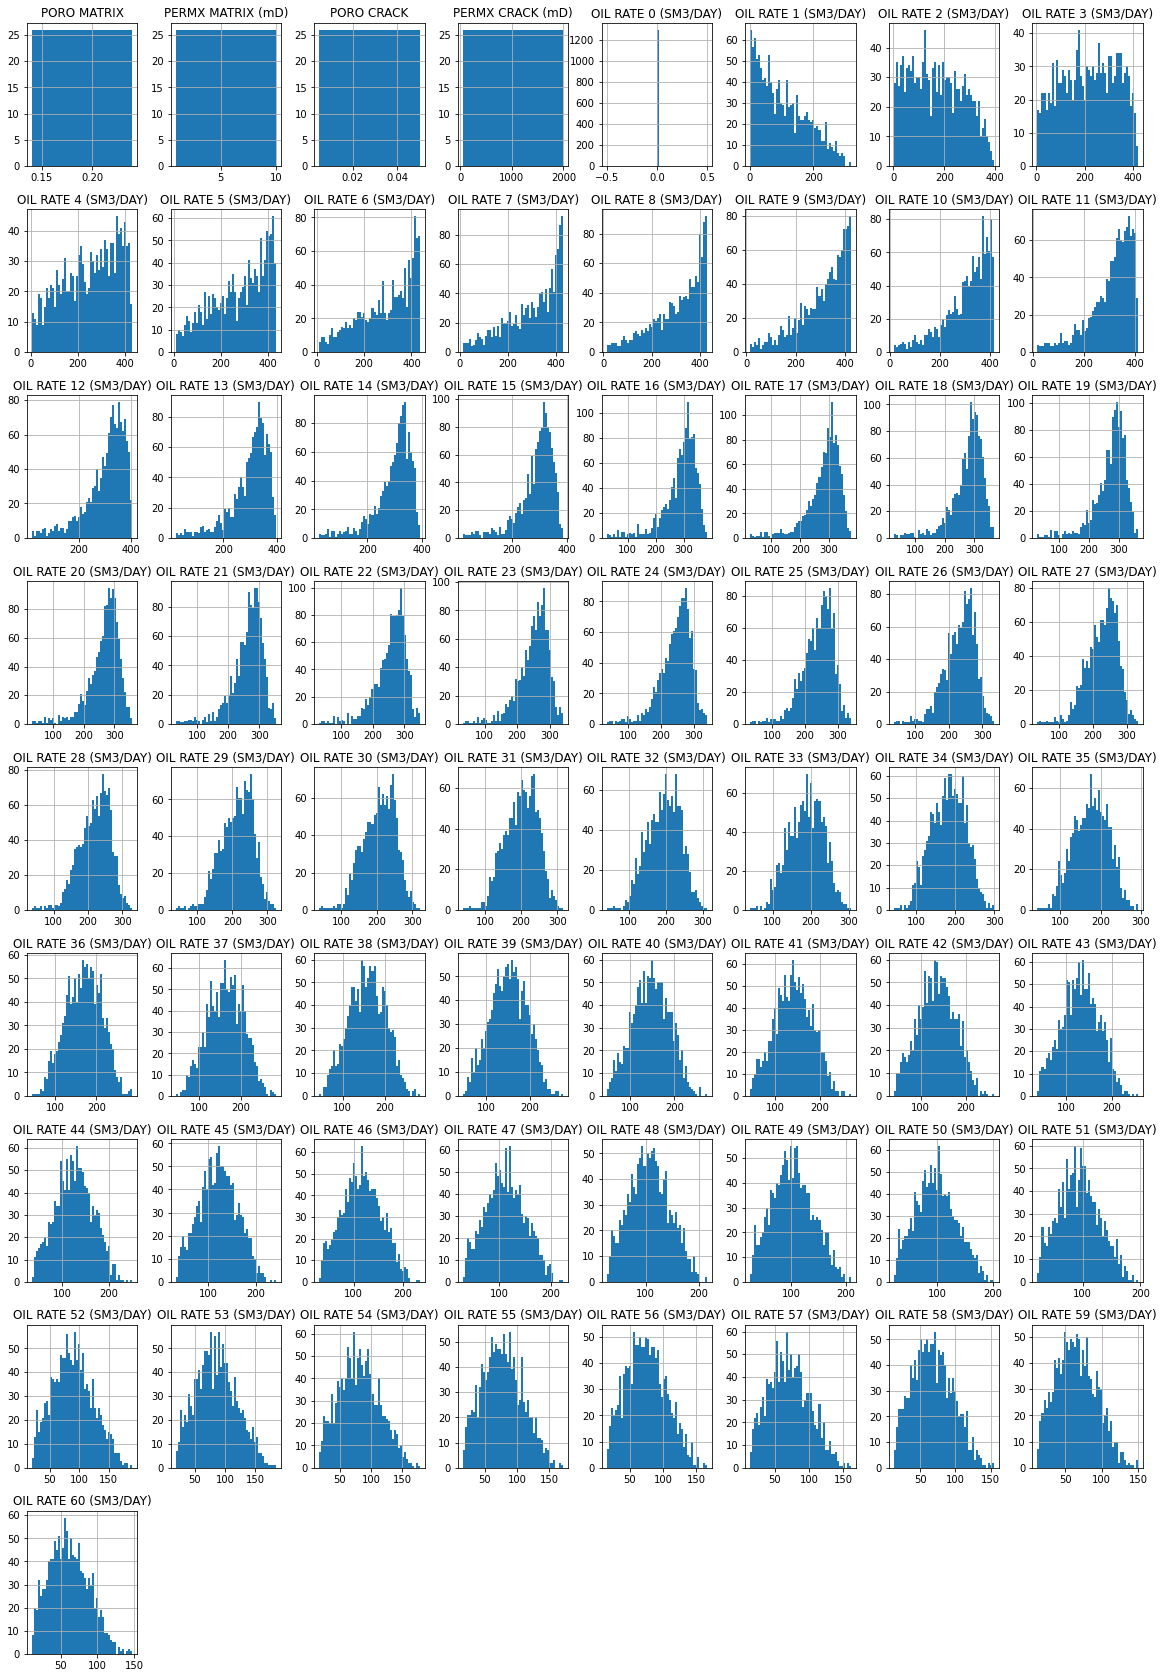

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data1.hist(bins=50, figsize=(20,30))
plt.show()

Разделяем на обучающую, валидационную и проверочную выборки. В данной ситуации просто последовательно по строкам, так как выборки в виде репрезентативных латинских гиперкубов были сгенерированы заранее (при создании датасетов)

In [9]:
data1_train, data1_valid, data1_test = data1[:400], data1[400:500], data1[500:]
data1_train

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,0.21100,2.17400,0.014675,1400.375,0,67.43562,131.4994,183.2932,224.5630,249.7905,...,85.50780,82.61002,79.99155,77.52847,74.87337,72.41143,69.99726,67.62505,65.28770,63.00892
1,0.19225,8.27100,0.010400,1483.250,0,64.59608,123.5471,171.1804,209.6795,238.2284,...,51.93359,48.90244,46.20414,43.79527,41.34522,38.86421,36.20404,33.51224,31.35427,29.51257
2,0.21975,6.38275,0.012200,1410.125,0,59.89659,116.4695,163.4962,202.2798,231.0852,...,84.37846,79.25503,73.43829,69.06870,65.60688,62.29403,58.89056,55.69555,52.56306,49.41299
3,0.17725,4.99500,0.037062,435.125,0,64.23164,128.6341,179.6088,221.4585,256.1675,...,103.99100,99.48777,95.12907,91.19880,86.97459,81.89688,75.66498,70.85409,66.96544,63.26744
4,0.20625,9.22650,0.034362,1088.375,0,140.04380,227.9327,286.8897,328.3230,357.4857,...,120.93770,115.23790,108.47000,100.44030,94.15714,88.79877,83.78366,79.06993,74.59715,70.24670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.19400,1.30950,0.029188,1322.375,0,140.05010,231.4490,293.0970,335.9403,363.6509,...,87.13790,84.63607,82.29264,80.25537,78.22527,76.10693,74.01292,71.91016,69.86423,67.83130
396,0.18250,2.62900,0.026263,1532.000,0,154.75160,248.6288,309.5805,350.0444,373.8444,...,84.39572,81.05545,77.91293,74.88055,72.15041,69.39994,66.65485,63.85868,61.13940,58.60407
397,0.18075,4.24425,0.028175,1790.375,0,190.27270,287.8030,345.0608,379.6468,398.1889,...,84.89961,80.52289,76.44715,72.58544,68.87292,65.51949,62.33810,59.16739,56.10056,53.21447
398,0.17375,4.28975,0.037738,1819.625,0,243.34980,340.2490,387.4410,411.3046,422.8306,...,97.91572,93.46467,88.90453,84.42133,80.20763,76.33758,72.62087,69.11850,65.78241,62.53588


Находим матрицу корреляций между входными и выходными параметрами обучающего датасета

In [10]:
corr_matrix = data1_train.corr()
corr_matrix.head(4)

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
PORO MATRIX,1.000000,-0.027488,-0.002740,-0.019672,NaN,-0.165495,-0.172745,-0.171777,-0.167073,-0.158990,...,0.695302,0.699890,0.703420,0.706391,0.709150,0.711644,0.713617,0.714301,0.714139,0.713507
PERMX MATRIX (mD),-0.027488,1.000000,-0.029665,-0.036800,NaN,0.018054,0.009834,0.003716,0.000851,0.004901,...,-0.060808,-0.078343,-0.095882,-0.112739,-0.128936,-0.144525,-0.159999,-0.175284,-0.189350,-0.202414
PORO CRACK,-0.002740,-0.029665,1.000000,0.035728,NaN,0.603965,0.605232,0.599663,0.594608,0.599274,...,0.615791,0.608293,0.600504,0.591897,0.582448,0.572252,0.561386,0.550618,0.539745,0.528252
PERMX CRACK (mD),-0.019672,-0.036800,0.035728,1.000000,NaN,0.743189,0.755495,0.759216,0.753929,0.735420,...,-0.159833,-0.167005,-0.173593,-0.180231,-0.186828,-0.193271,-0.199291,-0.205522,-0.211915,-0.218219


Saving figure corr_matrix_1


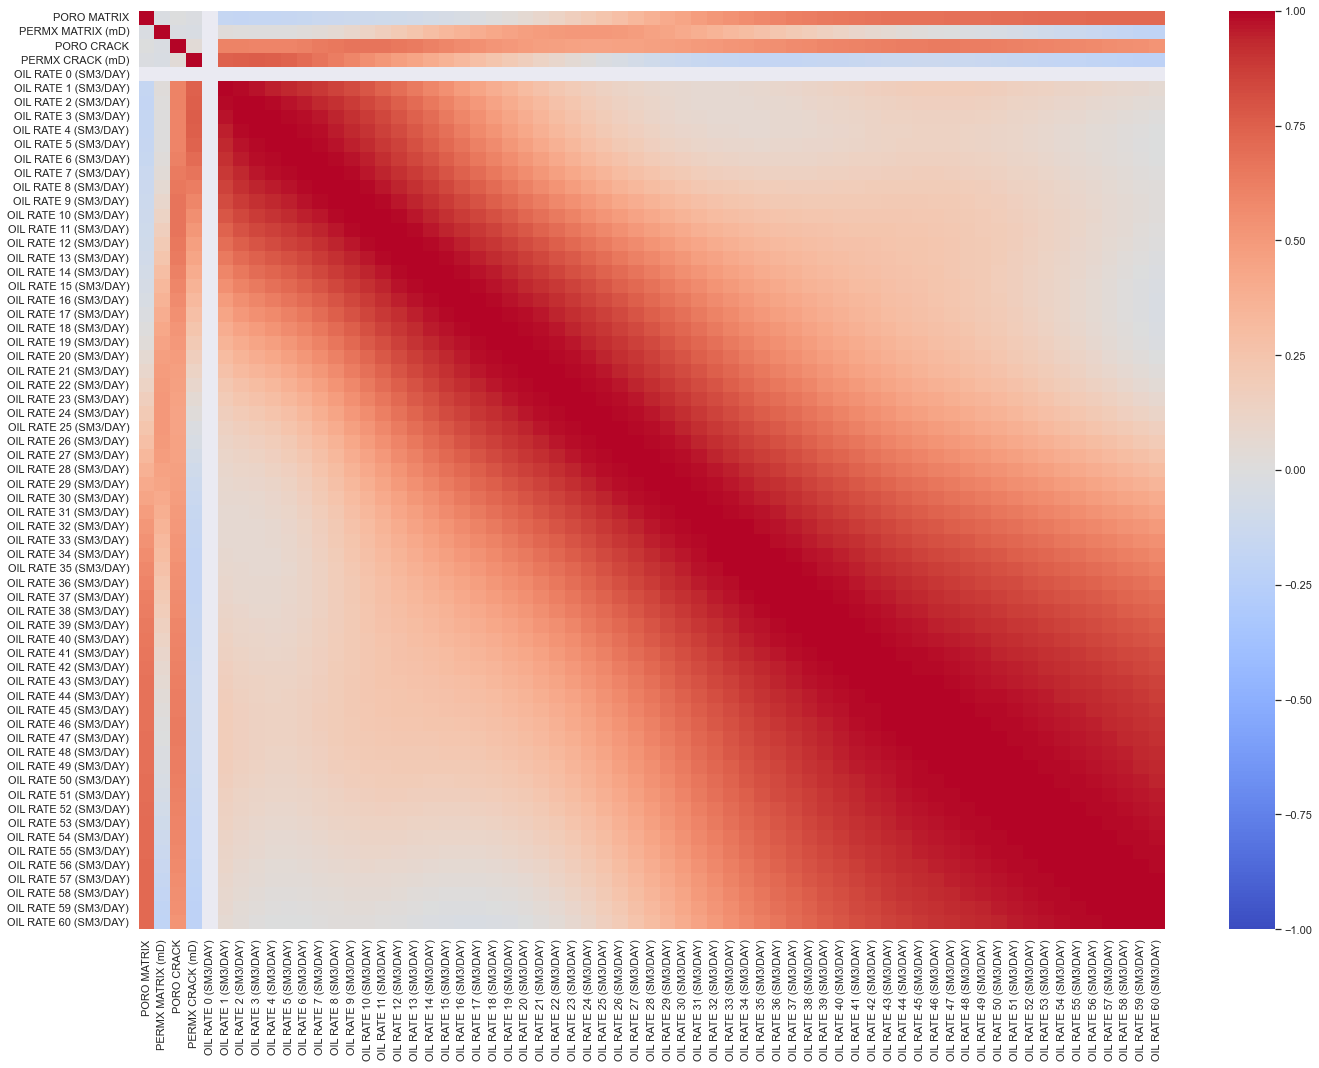

In [11]:
# строим тепловую карту матрицы корреляций и сохраняем изображение в папку images с помощью функции save_fig

import os
import seaborn as sns

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join('images','reservoir', fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

sns.set(rc = {'figure.figsize':(20,15)}, font_scale=1)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
#sns.heatmap(corr_matrix, cmap='Blues', annot=False, vmin=-1, vmax=1)
save_fig('corr_matrix_1')

 Из тепловой карты матрицы корреляций Пирсона видим, что на значения дебитов нефти в разные месяцы (с начала разработки) наиболее выраженно (линейно) влияют разные варьируемые входные параметры.
 
 Так, в первый год разработки наиболее выражена линейная корреляция дебитов с пористостью и проницаемостью трещин (физическое объяснение: изначально жидкость к сважине притекает в основном по трещинам, так как у них высокая проницаемость)
 
 На пятый год разработки наиболее выражена линейная корреляция дебитов с пористостью матрицы и трещин (физическое объяснение: от этих параметров зависит, насколько быстро нагнетаемая жидкость вытеснит извлекаемую нефть; при небольших значениях пористости матрицы и трещин на пятый год будут небольшие дебиты нефти, так как большое количество извлекаемых запасов нефти извлекли ранее; при высоких значениях пористости матрицы и трещин даже на пятый год в резервуаре останется существенное количество извлекаемых запасов и дебиты будут достаточно высокими)
 
 Из построенной карты также видим, что существенна линейная корреляция между значениями дебитов нефти, находящимися в произвольном выбранном диапазоне времени (длина выбранного отрезка времени не более года)

In [12]:
corr_matrix['PORO MATRIX'].sort_values(ascending=False)

PORO MATRIX              1.000000
OIL RATE 58 (SM3/DAY)    0.714301
OIL RATE 59 (SM3/DAY)    0.714139
OIL RATE 57 (SM3/DAY)    0.713617
OIL RATE 60 (SM3/DAY)    0.713507
                           ...   
OIL RATE 1 (SM3/DAY)    -0.165495
OIL RATE 4 (SM3/DAY)    -0.167073
OIL RATE 3 (SM3/DAY)    -0.171777
OIL RATE 2 (SM3/DAY)    -0.172745
OIL RATE 0 (SM3/DAY)          NaN
Name: PORO MATRIX, Length: 65, dtype: float64

In [13]:
corr_matrix['PERMX MATRIX (mD)'].sort_values(ascending=False)

PERMX MATRIX (mD)        1.000000
OIL RATE 24 (SM3/DAY)    0.505651
OIL RATE 23 (SM3/DAY)    0.504444
OIL RATE 25 (SM3/DAY)    0.501686
OIL RATE 22 (SM3/DAY)    0.498077
                           ...   
OIL RATE 57 (SM3/DAY)   -0.159999
OIL RATE 58 (SM3/DAY)   -0.175284
OIL RATE 59 (SM3/DAY)   -0.189350
OIL RATE 60 (SM3/DAY)   -0.202414
OIL RATE 0 (SM3/DAY)          NaN
Name: PERMX MATRIX (mD), Length: 65, dtype: float64

In [14]:
corr_matrix['PORO CRACK'].sort_values(ascending=False)

PORO CRACK               1.000000
OIL RATE 10 (SM3/DAY)    0.669352
OIL RATE 9 (SM3/DAY)     0.665362
OIL RATE 11 (SM3/DAY)    0.664694
OIL RATE 8 (SM3/DAY)     0.652855
                           ...   
OIL RATE 25 (SM3/DAY)    0.451183
PERMX CRACK (mD)         0.035728
PORO MATRIX             -0.002740
PERMX MATRIX (mD)       -0.029665
OIL RATE 0 (SM3/DAY)          NaN
Name: PORO CRACK, Length: 65, dtype: float64

In [15]:
corr_matrix['PERMX CRACK (mD)'].sort_values(ascending=False)

PERMX CRACK (mD)         1.000000
OIL RATE 3 (SM3/DAY)     0.759216
OIL RATE 2 (SM3/DAY)     0.755495
OIL RATE 4 (SM3/DAY)     0.753929
OIL RATE 1 (SM3/DAY)     0.743189
                           ...   
OIL RATE 57 (SM3/DAY)   -0.199291
OIL RATE 58 (SM3/DAY)   -0.205522
OIL RATE 59 (SM3/DAY)   -0.211915
OIL RATE 60 (SM3/DAY)   -0.218219
OIL RATE 0 (SM3/DAY)          NaN
Name: PERMX CRACK (mD), Length: 65, dtype: float64

In [16]:
input1_params = data1_train.drop(data1_train.columns[4:65],axis=1)
input1_params

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD)
0,0.21100,2.17400,0.014675,1400.375
1,0.19225,8.27100,0.010400,1483.250
2,0.21975,6.38275,0.012200,1410.125
3,0.17725,4.99500,0.037062,435.125
4,0.20625,9.22650,0.034362,1088.375
...,...,...,...,...
395,0.19400,1.30950,0.029188,1322.375
396,0.18250,2.62900,0.026263,1532.000
397,0.18075,4.24425,0.028175,1790.375
398,0.17375,4.28975,0.037738,1819.625


In [17]:
target1_params = data1_train.drop(data1_train.columns[0:5],axis=1)
target1_params

,OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),OIL RATE 6 (SM3/DAY),OIL RATE 7 (SM3/DAY),OIL RATE 8 (SM3/DAY),OIL RATE 9 (SM3/DAY),OIL RATE 10 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,67.43562,131.4994,183.2932,224.5630,249.7905,258.4887,261.1740,263.5871,265.9992,267.9070,...,85.50780,82.61002,79.99155,77.52847,74.87337,72.41143,69.99726,67.62505,65.28770,63.00892
1,64.59608,123.5471,171.1804,209.6795,238.2284,258.3864,273.9048,286.4111,296.4116,303.8384,...,51.93359,48.90244,46.20414,43.79527,41.34522,38.86421,36.20404,33.51224,31.35427,29.51257
2,59.89659,116.4695,163.4962,202.2798,231.0852,250.6133,264.9698,276.8945,286.8888,294.8035,...,84.37846,79.25503,73.43829,69.06870,65.60688,62.29403,58.89056,55.69555,52.56306,49.41299
3,64.23164,128.6341,179.6088,221.4585,256.1675,285.0209,308.8678,328.1422,342.5824,351.7134,...,103.99100,99.48777,95.12907,91.19880,86.97459,81.89688,75.66498,70.85409,66.96544,63.26744
4,140.04380,227.9327,286.8897,328.3230,357.4857,377.6734,390.1082,395.5245,394.8553,390.0262,...,120.93770,115.23790,108.47000,100.44030,94.15714,88.79877,83.78366,79.06993,74.59715,70.24670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,140.05010,231.4490,293.0970,335.9403,363.6509,375.1237,370.7146,354.7465,333.1945,311.1393,...,87.13790,84.63607,82.29264,80.25537,78.22527,76.10693,74.01292,71.91016,69.86423,67.83130
396,154.75160,248.6288,309.5805,350.0444,373.8444,381.0186,374.6098,360.3755,343.8419,328.0867,...,84.39572,81.05545,77.91293,74.88055,72.15041,69.39994,66.65485,63.85868,61.13940,58.60407
397,190.27270,287.8030,345.0608,379.6468,398.1889,402.4798,395.3380,381.8095,366.3968,351.7220,...,84.89961,80.52289,76.44715,72.58544,68.87292,65.51949,62.33810,59.16739,56.10056,53.21447
398,243.34980,340.2490,387.4410,411.3046,422.8306,425.7191,421.4184,411.0250,396.6588,380.7107,...,97.91572,93.46467,88.90453,84.42133,80.20763,76.33758,72.62087,69.11850,65.78241,62.53588


In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribs = list(input1_params)

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('std_scaler', StandardScaler()),
])

In [20]:
input1_params_prepared = num_pipeline.fit_transform(input1_params)
pd.DataFrame(input1_params_prepared, columns=input1_params.columns).describe()

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD)
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-5.861978e-16,-1.254552e-16,-7.549517e-17,-8.881784e-18
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-1.727726e+00,-1.727726e+00,-1.727726e+00,-1.727726e+00
25%,-8.638630e-01,-8.638630e-01,-8.638630e-01,-8.638630e-01
50%,-4.805184e-16,-1.691355e-16,0.000000e+00,0.000000e+00
75%,8.638630e-01,8.638630e-01,8.638630e-01,8.638630e-01
max,1.727726e+00,1.727726e+00,1.727726e+00,1.727726e+00


In [21]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(input1_params_prepared, target1_params['OIL RATE 1 (SM3/DAY)'])

LinearRegression()

In [22]:
some_data = input1_params.iloc[:7]
some_labels = target1_params.iloc[:7]['OIL RATE 1 (SM3/DAY)']
some_data_prepared = num_pipeline.transform(some_data)
print('Прогнозы: ', lin_reg.predict(some_data_prepared))
print('Факт: ', list(some_labels))

Прогнозы:  [ 84.33822457  95.40945308  80.51652948  84.06023173 134.29034712
  92.60731759 125.84142062]
Факт:  [67.43562, 64.59608, 59.89659, 64.23164, 140.0438, 94.28894, 99.46169]


In [23]:
from sklearn.metrics import mean_squared_error
output1_params = lin_reg.predict(input1_params_prepared)
lin_mse = mean_squared_error(target1_params['OIL RATE 1 (SM3/DAY)'], output1_params)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22.54649269862027

In [24]:
# устаревший подход

#import tensorflow.compat.v1 as tf_old
#tf_old.disable_v2_behavior()

#n_inputs = len(list(input1_params))
#n_hidden1 = 100
#n_outputs = 60

#X = tf_old.placeholder(tf_old.float32, shape=(None, n_inputs), name='X')
#y = tf_old.placeholder(tf_old.float32, shape=(None), name='y')

In [25]:
# текущая версия Питона и путь к интерпретатору

from platform import python_version
import sys

print(python_version())
print(sys.executable)

3.9.7
C:\Users\almuravtsev\AppData\Local\Programs\Python\Python39\python.exe


In [26]:
import tensorflow as tf
assert tf.__version__ >= '2.0'
from tensorflow import keras

In [27]:
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='tanh', input_shape=input1_params_prepared.shape[1:]),
    keras.layers.Dense(1)
])

In [28]:
valid1_input_prepared = num_pipeline.fit_transform(data1_valid.drop(data1_valid.columns[4:65],axis=1))
valid1_target = data1_valid.drop(data1_valid.columns[0:5],axis=1)

test1_input_prepared = num_pipeline.fit_transform(data1_test.drop(data1_test.columns[4:65],axis=1))
test1_target = data1_test.drop(data1_test.columns[0:5],axis=1)

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(input1_params_prepared, target1_params['OIL RATE 1 (SM3/DAY)'], epochs=100, \
    validation_data=(valid1_input_prepared, valid1_target['OIL RATE 1 (SM3/DAY)']))

mse_test = model.evaluate(test1_input_prepared, test1_target['OIL RATE 1 (SM3/DAY)'])
mse_test

Epoch 1/100
13/13 [==============================] - 0s 9ms/step - loss: 15298.4551 - val_loss: 11982.9658
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 8981.1348 - val_loss: 6109.8081
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 4889.1875 - val_loss: 3791.8291
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 3283.3928 - val_loss: 2718.9980
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 2358.9658 - val_loss: 1944.5988
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 1675.0844 - val_loss: 1408.8760
Epoch 7/100
13/13 [==============================] - ETA: 0s - loss: 1446.73 - 0s 3ms/step - loss: 1214.4861 - val_loss: 1060.4292
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 914.8953 - val_loss: 814.0368
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 708.4244 - val_loss: 654.4494
Epoch 10/100
13/13 [===========

15.062736511230469

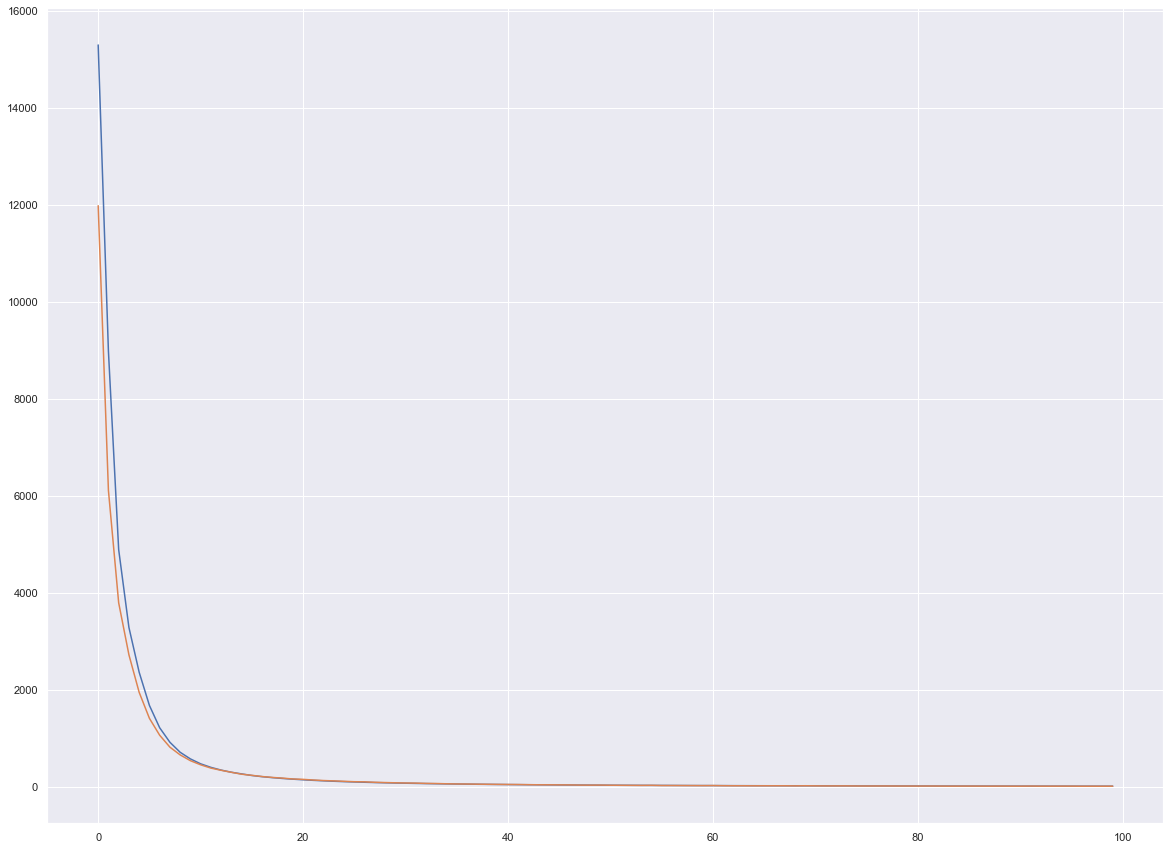

In [29]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.show()

In [30]:
# на обучающей выборке
print('Прогнозы: ', model.predict(some_data_prepared))
print('Факт: ', list(some_labels))

Прогнозы:  [[ 66.367   ]
 [ 63.62545 ]
 [ 58.978188]
 [ 65.02352 ]
 [141.34485 ]
 [ 95.68843 ]
 [ 98.1478  ]]
Факт:  [67.43562, 64.59608, 59.89659, 64.23164, 140.0438, 94.28894, 99.46169]


(array([  1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   2.,   0.,   0.,   1.,   1.,   1.,   1.,   1.,   4.,   1.,
          3.,   3.,  10., 559., 180.,  24.,   5.,   1.]),
 array([-295.20103538, -283.79984785, -272.39866032, -260.99747279,
        -249.59628525, -238.19509772, -226.79391019, -215.39272266,
        -203.99153512, -192.59034759, -181.18916006, -169.78797253,
        -158.38678499, -146.98559746, -135.58440993, -124.18322239,
        -112.78203486, -101.38084733,  -89.9796598 ,  -78.57847226,
         -67.17728473,  -55.7760972 ,  -44.37490967,  -32.97372213,
         -21.5725346 ,  -10.17134707,    1.22984046,   12.631028  ,
          24.03221553,   35.43340306,   46.83459059]),
 <BarContainer object of 30 artists>)

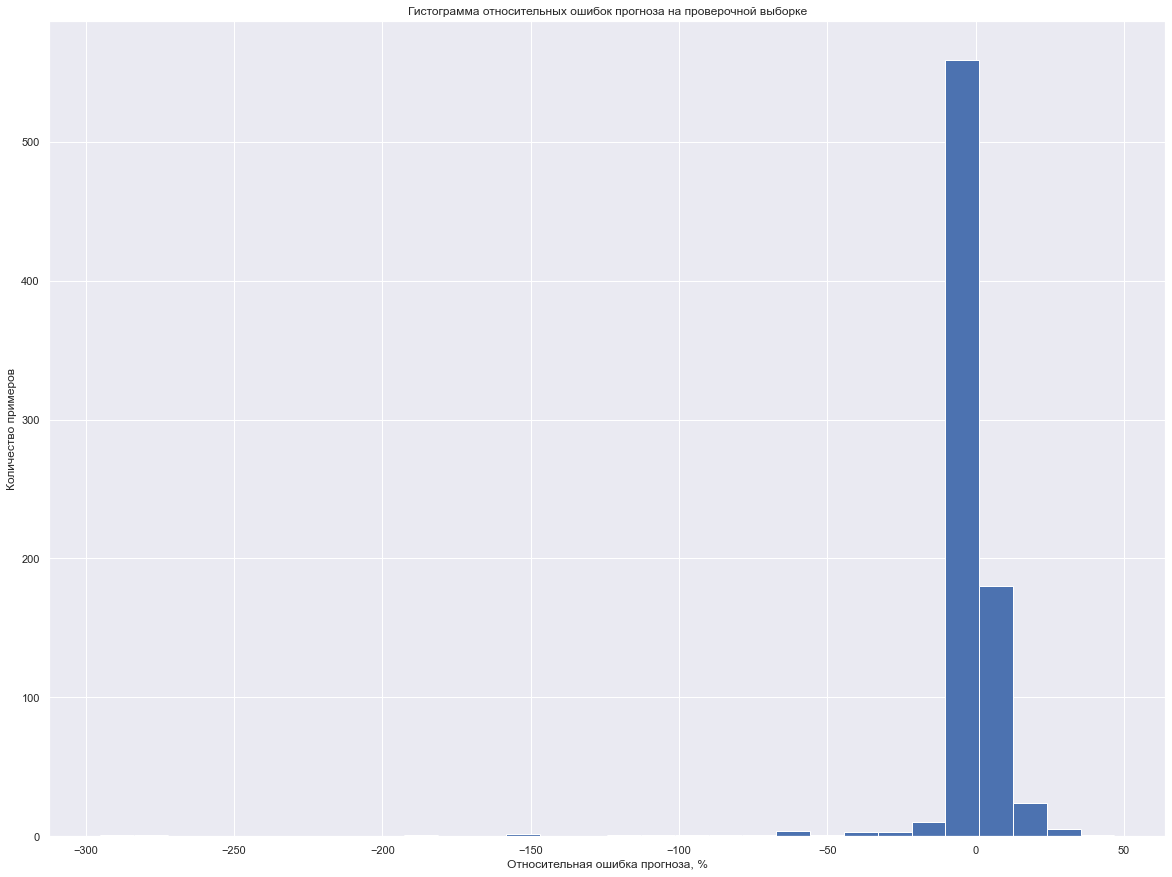

In [31]:
#  на проверочной выборке
test1_input = data1_test.drop(data1_test.columns[4:65],axis=1)
some_data = test1_input
some_labels = test1_target['OIL RATE 1 (SM3/DAY)']
some_data_prepared = num_pipeline.transform(some_data)
# print('Прогнозы: ', model.predict(some_data_prepared))
# print('Факт: ', list(some_labels))
relative_error = (np.array([item for elem in model.predict(some_data_prepared) for item in elem])-\
    np.array(list(some_labels)))/np.array(list(some_labels))*100
plt.title('Гистограмма относительных ошибок прогноза на проверочной выборке')
plt.xlabel('Относительная ошибка прогноза, %')
plt.ylabel('Количество примеров')
plt.hist(relative_error, bins=30)

## Исследование второго датасета

## Исследование третьего датасета

In [32]:
data3_train, data3_valid, data3_test = data3[:800], data3[800:1000], data3[1000:]
data3_train

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
0,0.177500,8.350625,0.038413,444.8750,0,452.2205,281.9055,181.4378,117.53240,76.46229,...,137.57210,130.15880,123.12450,116.42750,110.18060,104.29040,98.79874,93.62064,88.62532,83.99811
1,0.178375,2.321875,0.013213,596.0000,0,237.2867,191.7555,154.3891,125.15420,101.81400,...,123.60040,118.30710,113.19480,108.21250,103.49630,99.05050,94.80075,90.85400,86.65803,82.37943
2,0.170875,4.938125,0.027669,335.1875,0,301.1440,227.8870,172.7210,132.00200,101.21170,...,138.79240,130.94050,123.44120,116.36760,109.73140,103.49240,97.64111,92.03975,86.80898,81.93594
3,0.162750,5.950500,0.041787,286.4375,0,360.9188,249.5488,175.5890,124.06210,87.96030,...,147.82040,139.92880,132.47420,125.40490,118.69870,112.33430,106.39500,100.81110,95.55692,90.56459
4,0.154000,2.765500,0.021200,1115.1875,0,420.1661,219.5578,123.0940,69.81461,40.03331,...,74.58723,69.90481,65.63278,63.09455,60.21962,57.25322,54.44020,51.68710,49.04267,46.67566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.195500,5.848125,0.032563,642.3125,0,491.8824,300.6280,190.9600,122.23200,78.65869,...,145.89570,140.11790,134.53220,129.02640,123.65090,119.10650,114.09340,108.74190,103.88550,99.58262
796,0.205750,8.873875,0.030931,464.3750,0,434.4633,302.1286,213.9707,152.28550,108.80770,...,171.31490,162.37210,153.78190,145.45860,137.59030,130.28380,123.27580,116.69130,110.47670,104.67540
797,0.191000,7.975250,0.026375,364.4375,0,335.2292,253.5202,192.1970,146.94730,112.65680,...,170.39730,159.94760,149.80490,140.37970,131.36490,123.05120,115.36230,108.28340,101.52020,95.27845
798,0.201625,7.201750,0.037062,254.7500,0,337.2240,261.2242,202.3290,157.71870,123.27360,...,220.08930,210.82530,201.56190,192.20140,182.90420,173.82090,164.89570,156.35420,148.09030,140.29010


In [33]:
corr_matrix = data3_train.corr()
corr_matrix.head(4)

,PORO MATRIX,PERMX MATRIX (mD),PORO CRACK,PERMX CRACK (mD),OIL RATE 0 (SM3/DAY),OIL RATE 1 (SM3/DAY),OIL RATE 2 (SM3/DAY),OIL RATE 3 (SM3/DAY),OIL RATE 4 (SM3/DAY),OIL RATE 5 (SM3/DAY),...,OIL RATE 51 (SM3/DAY),OIL RATE 52 (SM3/DAY),OIL RATE 53 (SM3/DAY),OIL RATE 54 (SM3/DAY),OIL RATE 55 (SM3/DAY),OIL RATE 56 (SM3/DAY),OIL RATE 57 (SM3/DAY),OIL RATE 58 (SM3/DAY),OIL RATE 59 (SM3/DAY),OIL RATE 60 (SM3/DAY)
PORO MATRIX,1.000000,0.016672,-0.021754,-0.002660,NaN,0.251989,0.508169,0.485706,0.359716,0.015055,...,0.637228,0.640949,0.643164,0.644277,0.644355,0.643633,0.642156,0.640709,0.638758,0.636284
PERMX MATRIX (mD),0.016672,1.000000,0.008942,-0.010921,NaN,0.097368,0.120707,0.081301,0.061924,0.045139,...,0.117777,0.102204,0.086666,0.070658,0.053411,0.036181,0.019085,0.001959,-0.015142,-0.032072
PORO CRACK,-0.021754,0.008942,1.000000,-0.008488,NaN,0.551440,0.065169,-0.299074,-0.355059,0.069069,...,0.293869,0.294365,0.293040,0.290350,0.287434,0.284422,0.280937,0.276862,0.272711,0.268407
PERMX CRACK (mD),-0.002660,-0.010921,-0.008488,1.000000,NaN,0.599112,0.058448,-0.370070,-0.460119,-0.012156,...,-0.455391,-0.461692,-0.468945,-0.476508,-0.484076,-0.490628,-0.496520,-0.501628,-0.506192,-0.510337


Saving figure corr_matrix_3


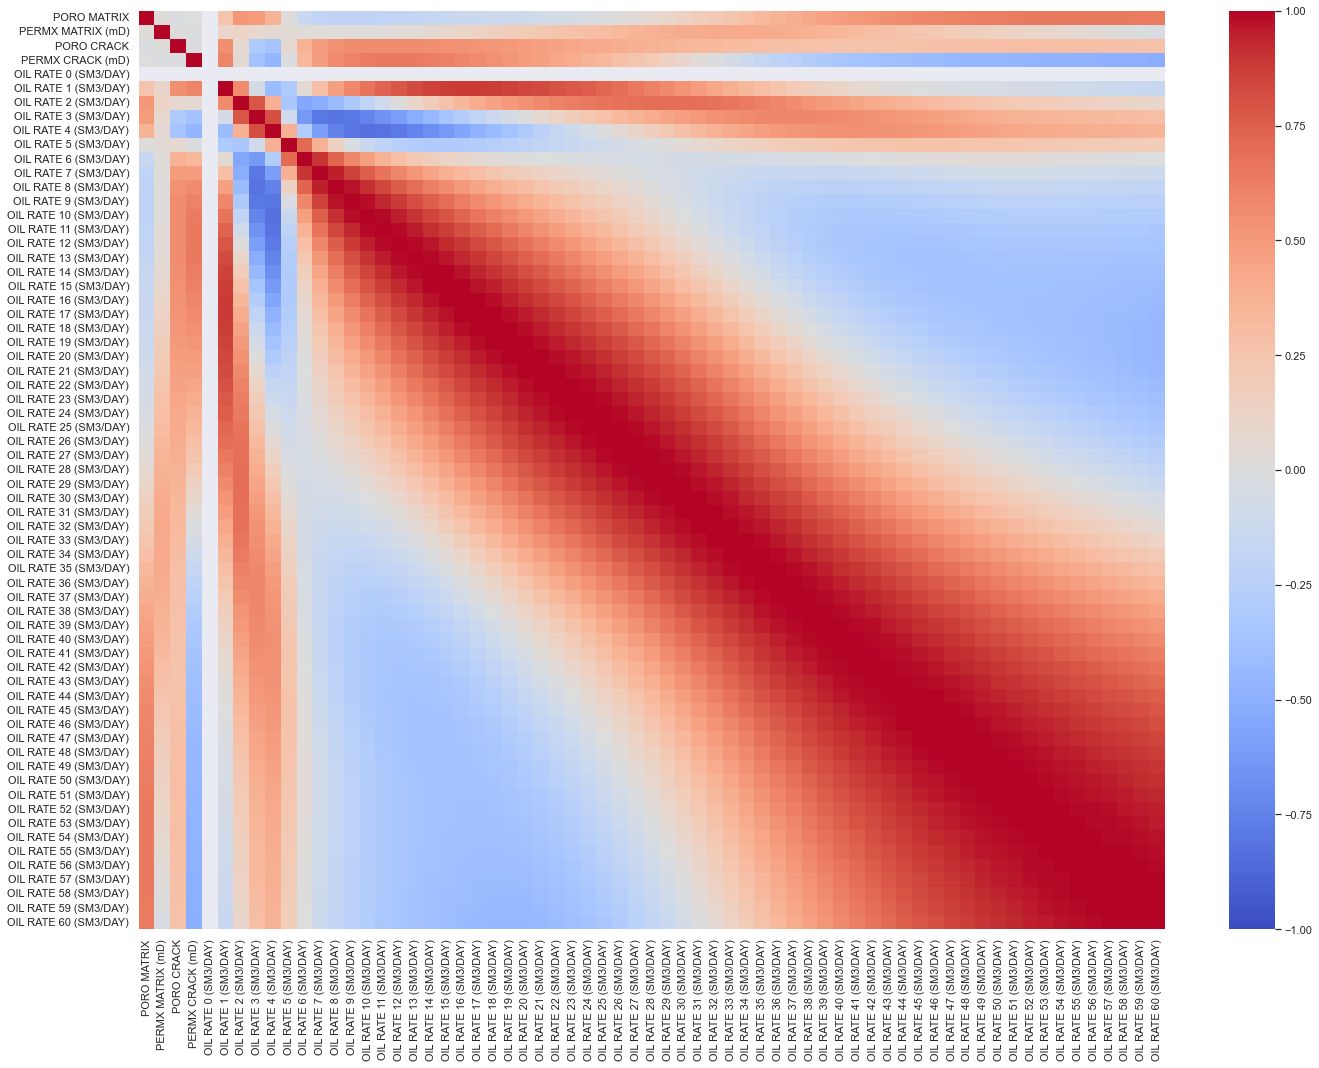

In [34]:
sns.set(rc = {'figure.figsize':(20,15)}, font_scale=1)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, vmin=-1, vmax=1)
#sns.heatmap(corr_matrix, cmap='Blues', annot=False, vmin=-1, vmax=1)
save_fig('corr_matrix_3')